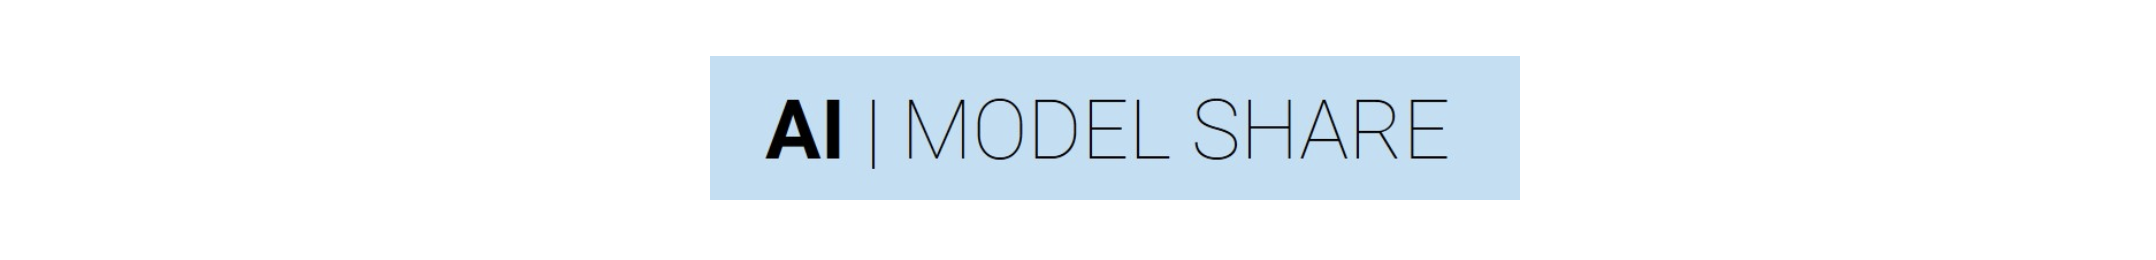

In [1]:
from IPython.display import Image, display
display(Image(filename='/content/aimodshare.png', embed=True))

**Titanic Dataset Classification Tutorial**
===

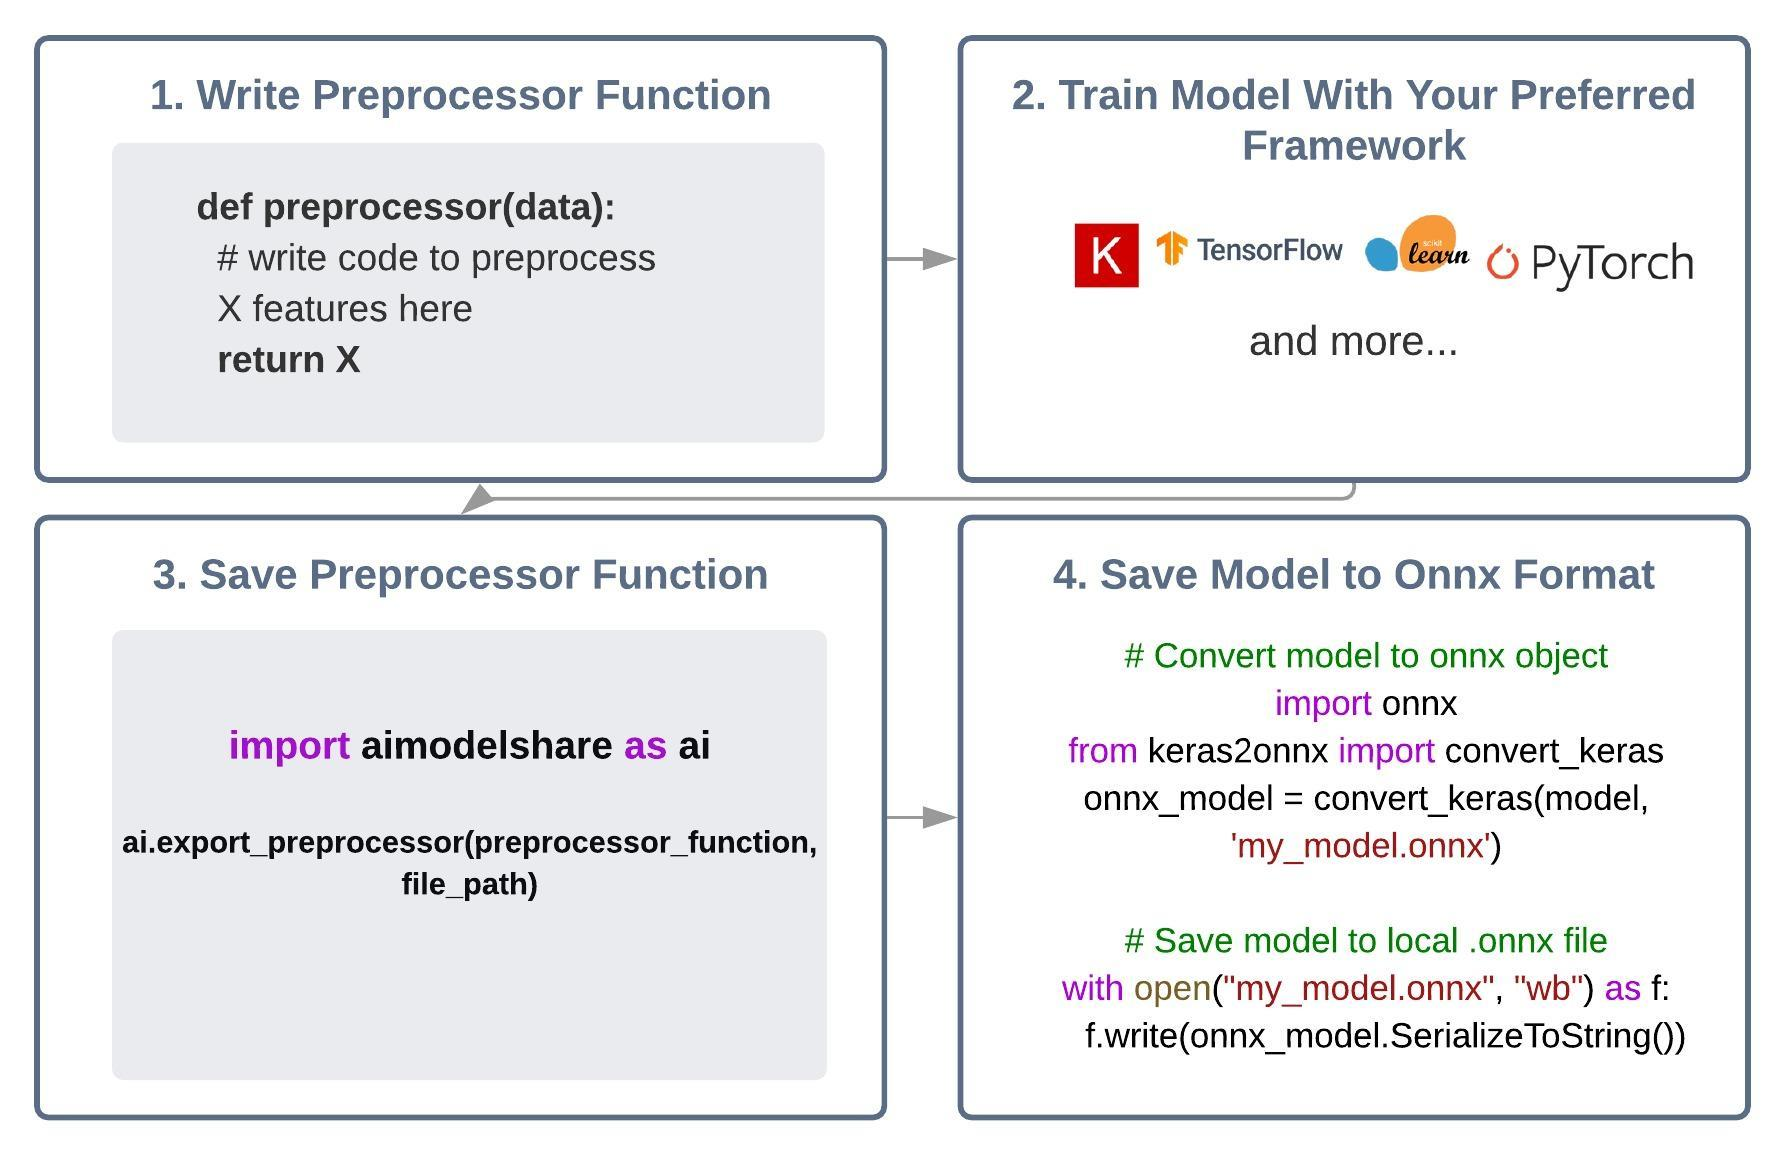

In [ ]:
# Signposing: Build a model in four simple steps...
from IPython.display import Image
Image(filename='/content/AI Modelshare Model and Preprocessor Object Preparation.jpeg', width=750)

## **(1) Preprocessor Function & Setup**

> ### A more advanced example demonstrating the flexibility of a new *Column Transformer* approach.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

# Read data from Titanic dataset.
titanic_url = ('https://raw.githubusercontent.com/amueller/'
               'scipy-2017-sklearn/091d371/notebooks/datasets/titanic3.csv')
data = pd.read_csv(titanic_url)

# We will train our classifier with the following features:
# Numeric Features:
# - age: float.
# - fare: float.
# Categorical Features:
# - embarked: categories encoded as strings {'C', 'S', 'Q'}.
# - sex: categories encoded as strings {'female', 'male'}.
# - pclass: ordinal integers {1, 2, 3}.

# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']

# Replacing missing values with Modal value and then one-hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Final preprocessor object set up with ColumnTransformer...

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


X = data.drop('survived', axis=1)
X = data.drop('name', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

preprocess = preprocess.fit(X_train)

In [ ]:
def preprocessor(data):
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [ ]:
preprocessor(X_train).shape

(1047, 10)

## **(2) Build Your Model**

In [ ]:
# Predicting whether a person survived...

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
import tensorflow.keras as keras
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model...
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fitting the ANN to the Training set...
model.fit(preprocessor(X_train), y_train, batch_size=60, epochs=7, verbose=2)

Epoch 1/7
18/18 - 0s - loss: 0.6346 - accuracy: 0.7011
Epoch 2/7
18/18 - 0s - loss: 0.5458 - accuracy: 0.7784
Epoch 3/7
18/18 - 0s - loss: 0.4935 - accuracy: 0.7727
Epoch 4/7
18/18 - 0s - loss: 0.4673 - accuracy: 0.7841
Epoch 5/7
18/18 - 0s - loss: 0.4562 - accuracy: 0.7966
Epoch 6/7
18/18 - 0s - loss: 0.4497 - accuracy: 0.7985
Epoch 7/7
18/18 - 0s - loss: 0.4448 - accuracy: 0.8013


## **(3) Save Preprocessor**

In [ ]:
# ! pip3 install aimodelshare

In [ ]:
def export_preprocessor(preprocessor_function, filepath):
    import dill
    with open(filepath, "wb") as f:
        dill.dump(preprocessor_function, f)

# import aimodelshare as ai # Once we can deploy this, we use it in lieu of the below.
# ai.export_preprocessor(preprocessor, "preprocessor.pkl")

export_preprocessor(preprocessor, "preprocessor.pkl")

## **(4) Save Keras Model to Onnx File Format**

In [ ]:
! pip3 install keras2onnx
! pip3 install onnxruntime

     |████████████████████████████████| 102kB 2.4MB/s 
     |████████████████████████████████| 81kB 4.8MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
     |████████████████████████████████| 7.4MB 7.9MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=d99ffeeb52ab0317dd8306a44c8d26a67c37f41e618148b15eb1d3107973cbff
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire
     |████████████████████████████████| 4.4MB 2.8MB/s 


In [ ]:
# Save model to onnx file...

import os
os.environ['TF_KERAS'] = '1' # Add this environmental variable whenever you use tensorflow's tf.keras to build your keras model.

import onnx
import keras2onnx

# Convert model to onnx object
import onnx
from keras2onnx import convert_keras
onnx_model = convert_keras(model, 'my_model.onnx')

# Save model to local .onnx file
with open("my_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

tf executing eager_mode: True
tf.keras model eager_mode: False
The ONNX operator number change on the optimization: 13 -> 9
The maximum opset needed by this model is only 9.
